## WEEK 6 ASSIGNMENT

### In this assignment, you will explore data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Sept 2020 through 1 Sept 2021 using some basic tools in Pandas!

Want to know more about earthquakes? Check out: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/science-earthquakes?qt-science_center_objects=0#qt-science_center_objects 

In [52]:
# import needed modules
import matplotlib as plt
import pandas as pd
import numpy as np
import chardet


#### (1)  Download the data yourself: https://earthquake.usgs.gov/earthquakes/search/ ; relevantly, some metadata can be found at: https://earthquake.usgs.gov/data/comcat/ 
- *Magnitude*: 4.5+
- *Date & Time*: Custom, 2020-09-01 00:00:00 to 2021-09-01 00:00:00 
- *Geographic Region*: World
- *Output Options*: Format, CSV; Order By, Time - Newest First

#### (2)  Read in data into a Pandas DataFrame
- don't specify an index column, allow Pandas to default to creating its own- the time strings are messy and you haven't learned yet how to deal with them!

In [63]:
#earthquake_query.csv
tdata = pd.read_csv('earthquake_query.csv', engine='python', usecols=['time','latitude','longitude','depth','mag','place'])
tdata

,time,latitude,longitude,depth,mag,place
0,2021-08-31T23:20:55.831Z,-2.8257,147.6197,10.00,4.5,"95 km SSE of Lorengau, Papua New Guinea"
1,2021-08-31T22:54:50.090Z,29.8780,-42.7378,10.00,4.8,northern Mid-Atlantic Ridge
2,2021-08-31T22:43:53.059Z,29.8625,-42.7499,10.00,4.5,northern Mid-Atlantic Ridge
3,2021-08-31T22:40:28.355Z,-61.1848,-39.0948,10.00,5.3,Scotia Sea
4,2021-08-31T22:28:53.273Z,-29.9042,-177.1601,10.00,4.7,"Kermadec Islands, New Zealand"
...,...,...,...,...,...,...
8480,2020-09-01T04:30:02.173Z,-28.0315,-71.2662,16.18,6.3,"78 km NW of Vallenar, Chile"
8481,2020-09-01T04:20:46.447Z,-27.9510,-71.1538,22.86,5.1,"79 km NNW of Vallenar, Chile"
8482,2020-09-01T04:09:28.470Z,-27.9686,-71.3062,21.00,6.8,"86 km NW of Vallenar, Chile"
8483,2020-09-01T00:59:05.867Z,44.1686,39.0414,10.00,4.5,"2 km N of Agoy, Russia"


#### (3)  We are only interested in the following variables (columns), so either only read in these variables, or read in all variables and subsequently drop the other columns, and confirm that you have done successfully 
   - time
   - latitude
   - longitude
   - depth
   - mag (magnitude of earthquake - strength)
   - place

#### (4) Print the first five and last five rows to get a sense of your data 

In [54]:
print(tdata.head(5))
print(tdata.tail(5))

                       time  latitude  longitude  depth  mag  \
0  2021-08-31T23:20:55.831Z   -2.8257   147.6197   10.0  4.5   
1  2021-08-31T22:54:50.090Z   29.8780   -42.7378   10.0  4.8   
2  2021-08-31T22:43:53.059Z   29.8625   -42.7499   10.0  4.5   
3  2021-08-31T22:40:28.355Z  -61.1848   -39.0948   10.0  5.3   
4  2021-08-31T22:28:53.273Z  -29.9042  -177.1601   10.0  4.7   

                                     place  
0  95 km SSE of Lorengau, Papua New Guinea  
1              northern Mid-Atlantic Ridge  
2              northern Mid-Atlantic Ridge  
3                               Scotia Sea  
4            Kermadec Islands, New Zealand  
                          time  latitude  longitude  depth  mag  \
8480  2020-09-01T04:30:02.173Z  -28.0315   -71.2662  16.18  6.3   
8481  2020-09-01T04:20:46.447Z  -27.9510   -71.1538  22.86  5.1   
8482  2020-09-01T04:09:28.470Z  -27.9686   -71.3062  21.00  6.8   
8483  2020-09-01T00:59:05.867Z   44.1686    39.0414  10.00  4.5   
8484  2020

#### (5)  Access just the time and depth columns (for all rows), using a special Pandas indexing function 

In [55]:
subset = tdata[['time', 'depth']]
print(f'The first 5 rows of this new subset are:\n{subset.head()}')

The first 5 rows of this new subset are:
                       time  depth
0  2021-08-31T23:20:55.831Z   10.0
1  2021-08-31T22:54:50.090Z   10.0
2  2021-08-31T22:43:53.059Z   10.0
3  2021-08-31T22:40:28.355Z   10.0
4  2021-08-31T22:28:53.273Z   10.0


#### (6) How many rows of observations are there in your DataFrame?

In [56]:
print(f'There are {tdata.shape[0]} rows')

There are 8485 rows


#### (7)  What is the time/date of the most recent earthquake? While you could manually use the results from earlier for this, you MUST actually access this observation using Pandas indexing

In [57]:
newliest = tdata['time'].max()
print(f'The most recent earthquake during the queried period was: {newliest}')

The most recent earthquake during the queried period was: 2021-08-31T23:20:55.831Z


#### (8) Are there any NaNs?  If so, properly deal with them.

In [58]:
print(f'The NaN situation is as follows:\n{tdata.isnull().sum(axis = 0)}')

The NaN situation is as follows:
time         0
latitude     0
longitude    0
depth        0
mag          0
place        9
dtype: int64


#### (9) Using a single function, calculate basic statistics for each column (each variable)

In [59]:
print(tdata.describe())

          latitude    longitude        depth          mag
count  8485.000000  8485.000000  8485.000000  8485.000000
mean     -8.662801    17.137941    53.524473     4.812922
std      32.099450   127.366156   102.427487     0.371608
min     -65.467600  -179.998500     0.600000     4.500000
25%     -29.378700   -82.537800    10.000000     4.600000
50%     -12.685400    30.384900    10.000000     4.700000
75%      13.193500   137.603800    48.480000     4.900000
max      87.375200   179.996200   664.740000     8.200000


#### (10) What are the magnitudes of the five strongest earthquakes in this dataset?

In [60]:
tdata.sort_values('mag',ascending=False).head(5)['mag']

1375    8.2
4778    8.1
1018    8.1
5559    7.7
7602    7.6
Name: mag, dtype: float64

#### (11)  Create a scatterplot of earthquake depth vs. magnitude.  Discuss if you notice a pattern (relationship) or not.
 - remember, there is built-in Pandas plotting functionality!
 - you must include axis labels and title 
 - need units for depth? check out the metadata I linked you to above 

Text(0.5, 0, 'Depth(km)')

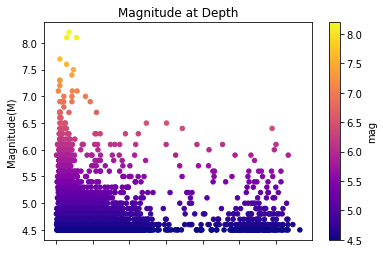

In [67]:
ax = tdata.plot.scatter(x='depth', y='mag', c='mag', title='Magnitude at Depth', colormap='plasma')
ax.set_ylabel('Magnitude(M)')
ax.set_xlabel('Depth(km)')
# I have no idea why the jupyter notebook appears to be cutting off the label?

#### (12)  Create a histogram of earthquake depth 

#### (13)  From your histogram in (12), please estimate the most common depth.